In [2]:
data_folder = "/content/drive/MyDrive/AMIGOS/Data_preprocessd_Unzip"

In [3]:
from scipy.io import loadmat
import os

# Kiểm tra cấu trúc của tệp .mat
participant = 1
mat_file_path = os.path.join(data_folder, f'Data_Preprocessed_P{participant:02d}', f'Data_Preprocessed_P{participant:02d}.mat')
raw = loadmat(mat_file_path)

# In các khóa chính trong dữ liệu .mat
print(raw.keys())

# Kiểm tra cấu trúc và kích thước của một số dữ liệu
print(raw['labels_ext_annotation'].shape)
print(raw['joined_data'].shape)


dict_keys(['__header__', '__version__', '__globals__', 'VideoIDs', 'joined_data', 'labels_ext_annotation', 'labels_selfassessment'])
(1, 20)
(1, 20)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import os
from scipy.io import loadmat

# Kiểm tra cấu trúc của tệp .mat
participant = 1
mat_file_path = os.path.join(data_folder, f'Data_Preprocessed_P{participant:02d}', f'Data_Preprocessed_P{participant:02d}.mat')
raw = loadmat(mat_file_path)

# In các khóa chính trong dữ liệu .mat
print(raw.keys())

# Kiểm tra cấu trúc và kích thước của một số dữ liệu
print(f"labels_ext_annotation shape: {raw['labels_ext_annotation'].shape}")
print(f"joined_data shape: {raw['joined_data'].shape}")

# Kiểm tra cấu trúc bên trong của labels_ext_annotation
print(f"labels_ext_annotation sample data: {raw['labels_ext_annotation'][0, 0]}")
print(f"labels_ext_annotation sample shape: {raw['labels_ext_annotation'][0, 0].shape}")

# Kiểm tra cấu trúc bên trong của joined_data
print(f"joined_data sample data: {raw['joined_data'][0, 0]}")
print(f"joined_data sample shape: {raw['joined_data'][0, 0].shape}")


dict_keys(['__header__', '__version__', '__globals__', 'VideoIDs', 'joined_data', 'labels_ext_annotation', 'labels_selfassessment'])
labels_ext_annotation shape: (1, 20)
joined_data shape: (1, 20)
labels_ext_annotation sample data: [[ 1.          0.05776439 -0.04344884]
 [ 2.          0.0754513  -0.05363643]
 [ 3.          0.04945779 -0.10131739]
 [ 4.         -0.16609842 -0.10942031]
 [ 5.         -0.02723557 -0.13405643]
 [ 6.         -0.11332459 -0.09807158]]
labels_ext_annotation sample shape: (6, 3)
joined_data sample data: [[ 9.73663478e-06  5.78764215e-06 -1.07347318e-05 ... -1.66402336e+01
  -1.15555038e+01 -8.94009937e+03]
 [-4.13422856e+00 -4.42354690e+00 -2.49054868e+00 ... -1.68301383e+01
  -1.41568617e+01 -1.04232609e+04]
 [-1.82200587e+01 -2.91480700e+00 -5.20181494e+00 ... -8.55812234e+00
  -9.69310806e+00  9.87280942e+03]
 ...
 [-9.87916955e+00  3.71242416e+00  4.37442170e+00 ...  1.05324643e+01
   2.15396787e+01  4.02338426e+05]
 [-1.20316206e+00  2.51541484e+00  2.333

In [5]:
import numpy as np
import os

# Đường dẫn đến thư mục chứa dữ liệu PSD và nhãn
psd_path = "/content/drive/MyDrive/AMIGOS/Data_preprocessd_Unzip/EEG/EEG/psd"
label_path = "/content/drive/MyDrive/AMIGOS/Data_preprocessd_Unzip/EEG/EEG/label"

# Danh sách để lưu trữ dữ liệu
psd_data = []
label_data = []

# Tải tất cả các tệp
for i in range(1, 40):  # Từ 01 đến 39
    psd_file = os.path.join(psd_path, f"{i:02d}.npy")
    label_file = os.path.join(label_path, f"{i:02d}.npy")

    if os.path.exists(psd_file) and os.path.exists(label_file):
        psd = np.load(psd_file)
        label = np.load(label_file)
        psd_data.append(psd)
        label_data.append(label)

        # Chỉ in cấu trúc của tệp đầu tiên để kiểm tra
        if i == 1:
            print(f"Structure of PSD data for participant 01: {psd.shape}")
            print(f"Structure of label data for participant 01: {label.shape}")
    else:
        print(f"Files for participant {i:02d} not found.")

# psd_data và label_data bây giờ chứa tất cả các mảng tương ứng từ tất cả các tệp


Structure of PSD data for participant 01: (340, 105)
Structure of label data for participant 01: (340, 2)
Files for participant 08 not found.
Files for participant 24 not found.
Files for participant 28 not found.


Files for participant 08 not found.
Files for participant 24 not found.
Files for participant 28 not found.
NaN values in PSD data: 32130, Inf values in PSD data: 0
0 0
Label data shape after converting to 1D: (12240,)
Original training labels shape: (9792,)
Original test labels shape: (2448,)
Training labels shape after one-hot encoding: (18958, 2)
Test labels shape after one-hot encoding: (2448, 2)
Training data shape: (18958, 105, 1)
Test data shape: (2448, 105, 1)
Training label distribution after SMOTE: {0: 9479, 1: 9479}
Test label distribution: {0: 2364, 1: 84}


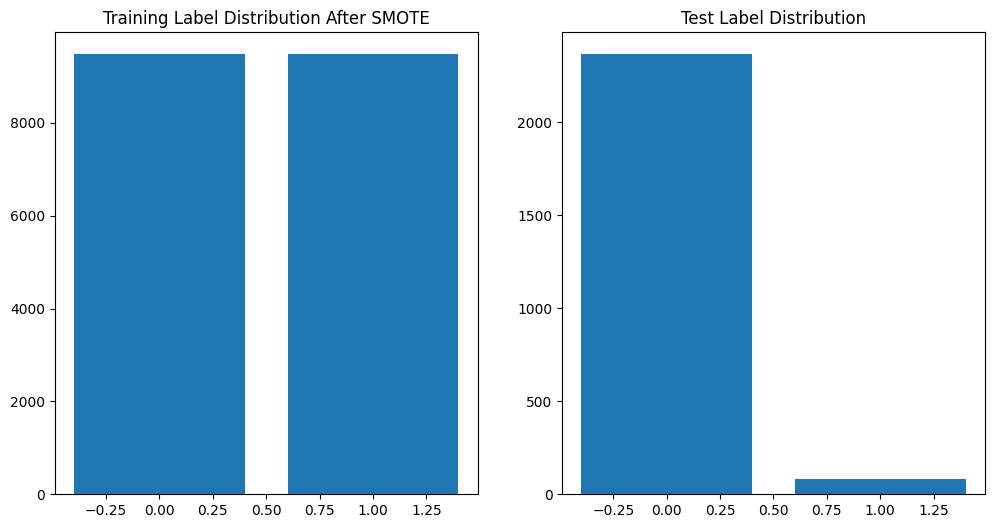

In [6]:
from imblearn.over_sampling import SMOTE
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# Đường dẫn đến thư mục chứa dữ liệu PSD và nhãn
psd_path = "/content/drive/MyDrive/AMIGOS/Data_preprocessd_Unzip/EEG/EEG/psd"
label_path = "/content/drive/MyDrive/AMIGOS/Data_preprocessd_Unzip/EEG/EEG/label"

# Danh sách để lưu trữ dữ liệu
psd_data = []
label_data = []

# Tải tất cả các tệp
for i in range(1, 40):  # Từ 01 đến 39
    psd_file = os.path.join(psd_path, f"{i:02d}.npy")
    label_file = os.path.join(label_path, f"{i:02d}.npy")

    if os.path.exists(psd_file) and os.path.exists(label_file):
        psd = np.load(psd_file)
        label = np.load(label_file)
        psd_data.append(psd)
        label_data.append(label)
    else:
        print(f"Files for participant {i:02d} not found.")

# Chuyển đổi dữ liệu sang dạng numpy array
psd_data = np.concatenate(psd_data, axis=0)
label_data = np.concatenate(label_data, axis=0)

# Kiểm tra giá trị NaN hoặc Inf
print(f"NaN values in PSD data: {np.isnan(psd_data).sum()}, Inf values in PSD data: {np.isinf(psd_data).sum()}")

# Thay thế giá trị NaN bằng giá trị trung bình của cột
psd_data = np.nan_to_num(psd_data, nan=np.nanmean(psd_data))

# Kiểm tra lại xem có giá trị NaN nào không
print(np.isnan(psd_data).sum(), np.isinf(psd_data).sum())

# Chuẩn hóa dữ liệu với MinMaxScaler
scaler = MinMaxScaler()
psd_data = scaler.fit_transform(psd_data)

# Kiểm tra và làm phẳng nhãn ban đầu nếu cần thiết
if label_data.ndim == 3 and label_data.shape[-1] == 2:
    label_data = label_data[:, 0]

# Chuyển đổi nhãn về dạng 1D
if label_data.ndim > 1:
    label_data = np.argmax(label_data, axis=1)  # Chuyển nhãn từ one-hot về dạng số nguyên

print(f"Label data shape after converting to 1D: {label_data.shape}")

# Chia dữ liệu thành tập huấn luyện và kiểm thử
X_train, X_test, y_train, y_test = train_test_split(psd_data, label_data, test_size=0.2, random_state=42)

# Kiểm tra nhãn ban đầu
print(f"Original training labels shape: {y_train.shape}")
print(f"Original test labels shape: {y_test.shape}")

# Sử dụng SMOTE để cân bằng dữ liệu
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Áp dụng one-hot encoding cho nhãn
y_train_res = to_categorical(y_train_res)
y_test = to_categorical(y_test)

# Kiểm tra lại kích thước dữ liệu sau khi áp dụng one-hot encoding
print(f"Training labels shape after one-hot encoding: {y_train_res.shape}")
print(f"Test labels shape after one-hot encoding: {y_test.shape}")

# Thêm một kích thước kênh vào dữ liệu
X_train_res = X_train_res[..., np.newaxis]
X_test = X_test[..., np.newaxis]

print(f"Training data shape: {X_train_res.shape}")
print(f"Test data shape: {X_test.shape}")

# Kiểm tra phân phối của nhãn
train_label_counts = np.unique(np.argmax(y_train_res, axis=1), return_counts=True)
print("Training label distribution after SMOTE:", dict(zip(train_label_counts[0], train_label_counts[1])))
test_label_counts = np.unique(np.argmax(y_test, axis=1), return_counts=True)
print("Test label distribution:", dict(zip(test_label_counts[0], test_label_counts[1])))

# Vẽ biểu đồ phân phối nhãn
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(train_label_counts[0], train_label_counts[1])
plt.title("Training Label Distribution After SMOTE")
plt.subplot(1, 2, 2)
plt.bar(test_label_counts[0], test_label_counts[1])
plt.title("Test Label Distribution")
plt.show()




In [7]:
# Khởi tạo mô hình
model = Sequential()

# Thêm các tầng tích chập
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_res.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

# Flatten và thêm tầng Dense
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train_res.shape[1], activation='softmax'))  # Giả sử bạn có 2 lớp nhãn

# Biên dịch mô hình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# In tóm tắt mô hình
model.summary()

# Huấn luyện mô hình
history = model.fit(
    X_train_res, y_train_res,
    epochs=50,  # Số vòng lặp huấn luyện, tăng số này có thể cải thiện hiệu suất mô hình nhưng cũng có thể dẫn đến overfitting
    batch_size=256,  # Số lượng mẫu để xử lý trong một lần lặp
    validation_data=(X_test, y_test),  # Cung cấp dữ liệu kiểm thử để theo dõi hiệu suất trong quá trình huấn luyện
    verbose=1  # Hiển thị tiến trình huấn luyện
)

# Đánh giá mô hình trên tập kiểm thử
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc * 100:.2f}%")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 103, 32)           128       
                                                                 
 max_pooling1d (MaxPooling1  (None, 51, 32)            0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 51, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 49, 64)            6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 24, 64)            0         
 g1D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 24, 64)            0

In [ ]:
# EEG_MCS

In [9]:
# Model MCIC

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Activation, AveragePooling1D, Flatten, Dense, Dropout
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.optimizers import Adam
def EEG_MCIC(input_shape, num_classes, params):
    input_layer = Input(shape=input_shape)

    # Branch 1: Conv1D with small kernel size
    branch_1 = Conv1D(filters=params['filter_size_branch_1'], kernel_size=params['kernel_size_branch_1'], padding='same', activation='relu')(input_layer)
    branch_1 = BatchNormalization()(branch_1)

    # Branch 2: Dilated Causal Convolution
    branch_2 = Conv1D(filters=params['filter_size_branch_2'], kernel_size=params['kernel_size_branch_2'], dilation_rate=params['dilation_rate_branch_2'], padding='causal', activation='relu')(input_layer)
    branch_2 = BatchNormalization()(branch_2)

    # Combining branches
    merged = Concatenate(axis=-1)([branch_1, branch_2])

    # Following the merged layer with more convolutions
    x = Conv1D(filters=params['final_conv_filters'], kernel_size=3, padding='same', activation='relu')(merged)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = AveragePooling1D(pool_size=2)(x)
    x = Dropout(params['dropout_rate'])(x)

    # Flattening and Dense layers for classification
    x = Flatten()(x)
    x = Dense(params['dense_units'], activation='relu')(x)
    x = Dropout(params['dropout_rate'])(x)
    output_layer = Dense(num_classes, activation='softmax')(x)
    model_MCIC = Model(inputs=input_layer, outputs=output_layer)


    return model_MCIC
params = {
    'filter_size_branch_1': 32,
    'filter_size_branch_2': 32,
    'kernel_size_branch_1': 3,
    'kernel_size_branch_2': 5,
    'dilation_rate_branch_2': 2,
    'final_conv_filters': 64,
    'dense_units': 2048,
    'dropout_rate': 0.12,
    'learning_rate': 0.00012
}

# Example usage
input_shape = (105, 1)  # Adjust based on your dataset
num_classes = 2

model.summary()
model = EEG_MCIC(input_shape, num_classes, params)
model.compile(optimizer=Adam(learning_rate=params['learning_rate']), loss='categorical_crossentropy', metrics=['accuracy'])




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 103, 32)           128       
                                                                 
 max_pooling1d (MaxPooling1  (None, 51, 32)            0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 51, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 49, 64)            6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 24, 64)            0         
 g1D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 24, 64)            0

In [10]:
# Huấn luyện mô hình
history = model.fit(
    X_train_res, y_train_res,
    epochs=50,  # Số vòng lặp huấn luyện, tăng số này có thể cải thiện hiệu suất mô hình nhưng cũng có thể dẫn đến overfitting
    batch_size=256,  # Số lượng mẫu để xử lý trong một lần lặp
    validation_data=(X_test, y_test),  # Cung cấp dữ liệu kiểm thử để theo dõi hiệu suất trong quá trình huấn luyện
    verbose=1  # Hiển thị tiến trình huấn luyện
)

# Đánh giá mô hình trên tập kiểm thử
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc * 100:.2f}%")

Epoch 1/50
75/75 [==============================] - 5s 17ms/step - loss: 0.5722 - accuracy: 0.7382 - val_loss: 0.6921 - val_accuracy: 0.6544
Epoch 2/50
75/75 [==============================] - 1s 11ms/step - loss: 0.3773 - accuracy: 0.8387 - val_loss: 0.6916 - val_accuracy: 0.6932
Epoch 3/50
75/75 [==============================] - 1s 11ms/step - loss: 0.3248 - accuracy: 0.8667 - val_loss: 0.6884 - val_accuracy: 0.7120
Epoch 4/50
75/75 [==============================] - 1s 11ms/step - loss: 0.2924 - accuracy: 0.8833 - val_loss: 0.6659 - val_accuracy: 0.7198
Epoch 5/50
75/75 [==============================] - 1s 11ms/step - loss: 0.2695 - accuracy: 0.8988 - val_loss: 0.5891 - val_accuracy: 0.8002
Epoch 6/50
75/75 [==============================] - 1s 11ms/step - loss: 0.2498 - accuracy: 0.9021 - val_loss: 0.4553 - val_accuracy: 0.8648
Epoch 7/50
75/75 [==============================] - 1s 11ms/step - loss: 0.2359 - accuracy: 0.9121 - val_loss: 0.3951 - val_accuracy: 0.8611
Epoch 8/50
75

In [11]:
# Đánh giá mô hình trên tập kiểm thử
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc * 100:.2f}%")

# Dự đoán trên tập kiểm thử
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# In báo cáo đánh giá mô hình
from sklearn.metrics import classification_report
print(classification_report(y_true_classes, y_pred_classes))

77/77 - 0s - loss: 0.2831 - accuracy: 0.9326 - 190ms/epoch - 2ms/step
Test accuracy: 93.26%
77/77 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      2364
           1       0.26      0.52      0.35        84

    accuracy                           0.93      2448
   macro avg       0.62      0.74      0.66      2448
weighted avg       0.96      0.93      0.94      2448

